## LOAD LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## LOAD DATA
do basic data checks

In [2]:
# Load the data
data = pd.read_csv('./data/education_career_success.csv')
data.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer_Science,3,9,1,10,6,1,57400,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600,9,5,Entry,2,No


In [3]:
cols = ['Age', 'Gender', 'High_School_GPA', 'SAT_Score',
       'University_Ranking', 'University_GPA', 'Field_of_Study',
       'Internships_Completed', 'Projects_Completed', 'Certifications',
       'Soft_Skills_Score', 'Networking_Score', 'Job_Offers',
       'Starting_Salary'] # Selecting the columns to be used in the model

data = data[cols]

In [4]:
# Check the dimensions of the data
data.shape

(5000, 14)

## EXPLORATORY DATA ANALYSIS

In [5]:
# Check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    5000 non-null   int64  
 1   Gender                 5000 non-null   object 
 2   High_School_GPA        5000 non-null   float64
 3   SAT_Score              5000 non-null   int64  
 4   University_Ranking     5000 non-null   int64  
 5   University_GPA         5000 non-null   float64
 6   Field_of_Study         5000 non-null   object 
 7   Internships_Completed  5000 non-null   int64  
 8   Projects_Completed     5000 non-null   int64  
 9   Certifications         5000 non-null   int64  
 10  Soft_Skills_Score      5000 non-null   int64  
 11  Networking_Score       5000 non-null   int64  
 12  Job_Offers             5000 non-null   int64  
 13  Starting_Salary        5000 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 547.0+

**Separate Quantitative and Categorical data**

In [6]:
num_cols = data.select_dtypes(include=[np.number]).columns
cat_cols = data.select_dtypes(include=[object]).columns
print(num_cols)
print(cat_cols)

Index(['Age', 'High_School_GPA', 'SAT_Score', 'University_Ranking',
       'University_GPA', 'Internships_Completed', 'Projects_Completed',
       'Certifications', 'Soft_Skills_Score', 'Networking_Score', 'Job_Offers',
       'Starting_Salary'],
      dtype='object')
Index(['Gender', 'Field_of_Study'], dtype='object')


**conduct exploratory analysis on quantitative data**

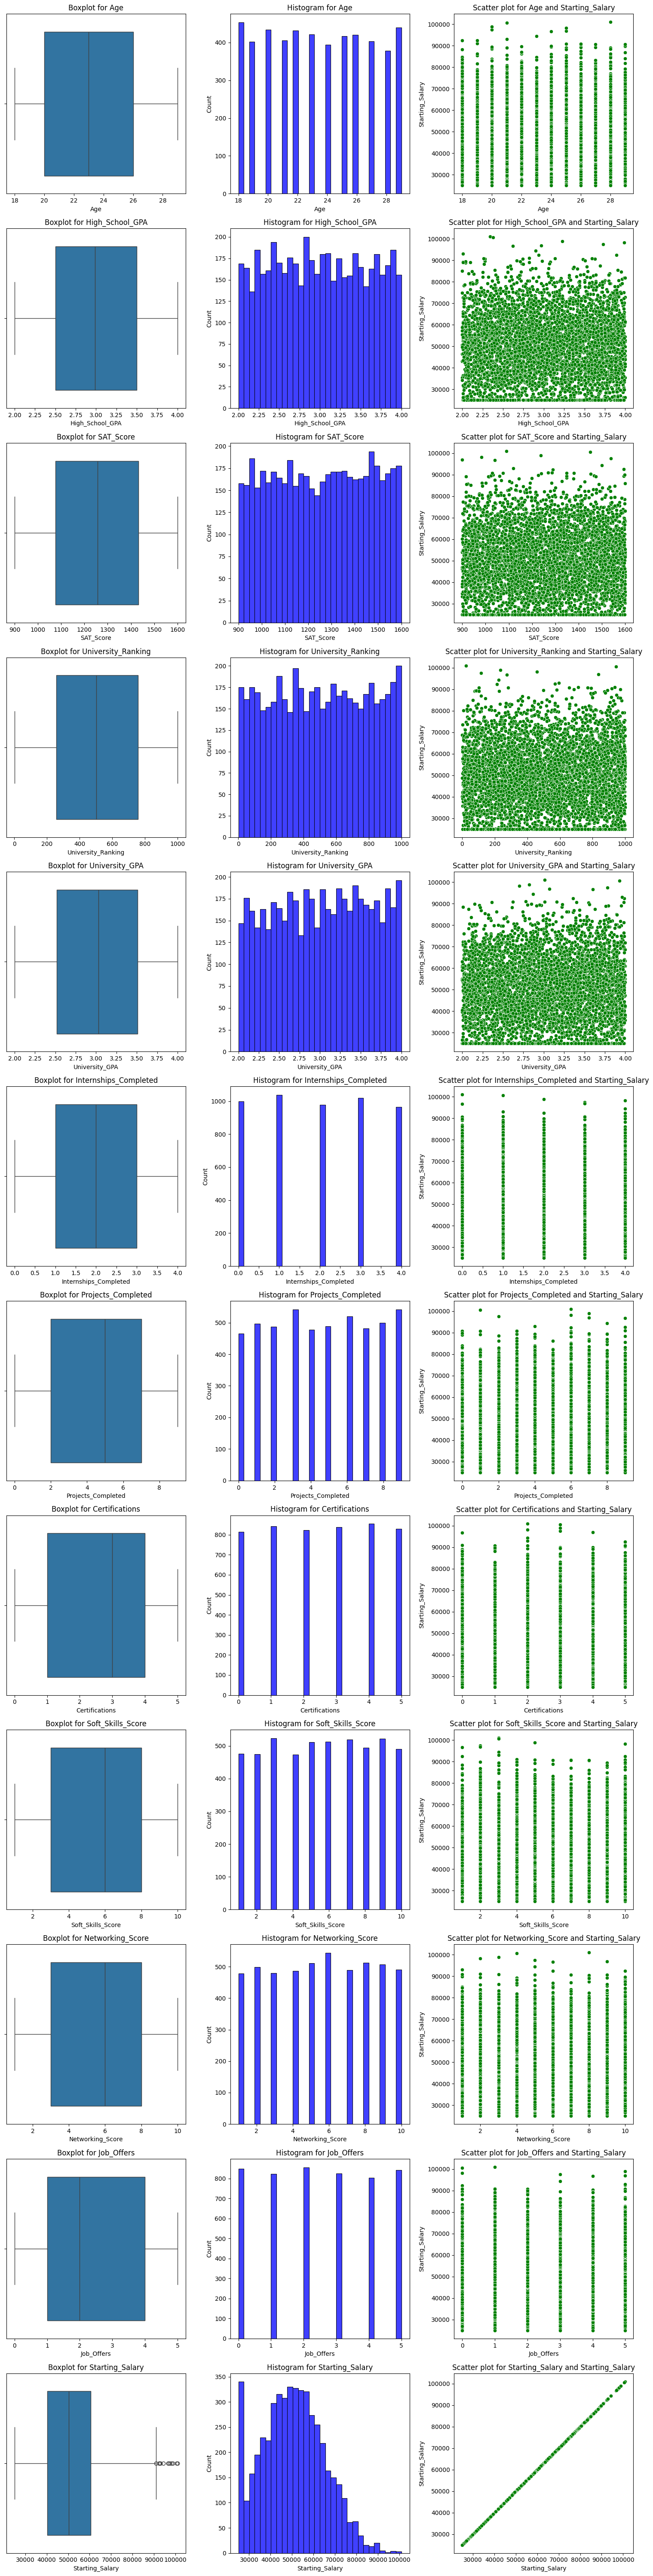

In [7]:
fig, axes = plt.subplots(len(num_cols), 3, figsize=(15, 5 * len(num_cols)))

for i, col in enumerate(num_cols):
    # Boxplot
    sns.boxplot(data=data, x=col, ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot for {col}')
    axes[i, 0].set_xlabel(col)
    
    # Histogram
    sns.histplot(data[col], bins=30, color='blue', ax=axes[i, 1])
    axes[i, 1].set_title(f'Histogram for {col}')
    axes[i, 1].set_xlabel(col)
    
    # Scatter plot with Starting_Salary
    sns.scatterplot(data=data, x=col, y='Starting_Salary', color='green', ax=axes[i, 2])
    axes[i, 2].set_title(f'Scatter plot for {col} and Starting_Salary')
    axes[i, 2].set_xlabel(col)

plt.tight_layout()
plt.show()

In [8]:
data.describe()

,Age,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,23.442200,2.996978,1253.832000,504.335600,3.020028,1.982200,4.562800,2.512200,5.546000,5.538000,2.488800,50563.540000
std,3.473712,0.575673,203.228954,291.060011,0.576047,1.408219,2.872927,1.703183,2.851159,2.850084,1.711859,14494.958207
min,18.000000,2.000000,900.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25000.000000
25%,20.000000,2.500000,1076.000000,256.000000,2.520000,1.000000,2.000000,1.000000,3.000000,3.000000,1.000000,40200.000000
50%,23.000000,2.990000,1257.000000,501.500000,3.030000,2.000000,5.000000,3.000000,6.000000,6.000000,2.000000,50300.000000
75%,26.000000,3.500000,1432.000000,759.000000,3.510000,3.000000,7.000000,4.000000,8.000000,8.000000,4.000000,60500.000000
max,29.000000,4.000000,1600.000000,1000.000000,4.000000,4.000000,9.000000,5.000000,10.000000,10.000000,5.000000,101000.000000


**conduct exploratory analysis on categorical data**

In [9]:
cat_cols

Index(['Gender', 'Field_of_Study'], dtype='object')

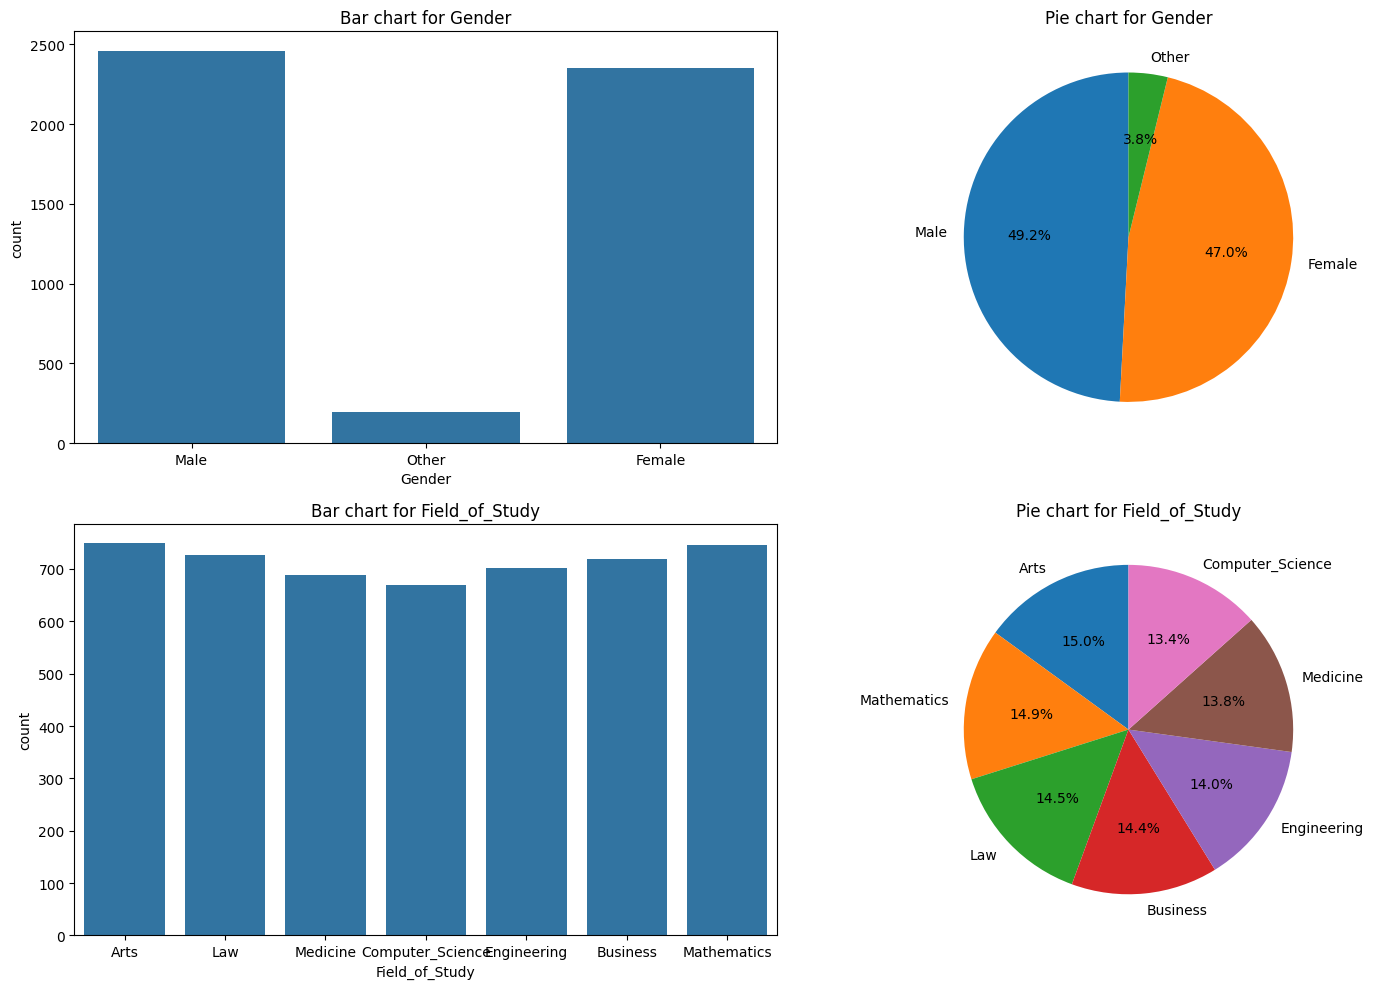

In [10]:
fig, axes = plt.subplots(len(cat_cols), 2, figsize=(15, 5 * len(cat_cols)))

for i, col in enumerate(cat_cols):
    # Bar chart
    sns.countplot(data=data, x=col, ax=axes[i, 0])
    axes[i, 0].set_title(f'Bar chart for {col}')
    axes[i, 0].set_xlabel(col)
    
    # Pie chart
    data[col].value_counts().plot.pie(ax=axes[i, 1], autopct='%1.1f%%', startangle=90)
    axes[i, 1].set_title(f'Pie chart for {col}')
    axes[i, 1].set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Dummy encode Gender and Field_of_Study
data = pd.get_dummies(data, columns=['Gender', 'Field_of_Study'], dtype=int, drop_first=True)

data.head()

,Age,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Gender_Male,Gender_Other,Field_of_Study_Business,Field_of_Study_Computer_Science,Field_of_Study_Engineering,Field_of_Study_Law,Field_of_Study_Mathematics,Field_of_Study_Medicine
0,24,3.58,1052,291,3.96,3,7,2,9,8,5,27200,1,0,0,0,0,0,0,0
1,21,2.52,1211,112,3.63,4,7,3,8,1,4,25000,0,1,0,0,0,1,0,0
2,28,3.42,1193,715,2.63,4,8,1,1,9,0,42400,0,0,0,0,0,0,0,1
3,25,2.43,1497,170,2.81,3,9,1,10,6,1,57400,1,0,0,1,0,0,0,0
4,22,2.08,1012,599,2.48,4,6,4,10,9,4,47600,1,0,0,0,1,0,0,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              5000 non-null   int64  
 1   High_School_GPA                  5000 non-null   float64
 2   SAT_Score                        5000 non-null   int64  
 3   University_Ranking               5000 non-null   int64  
 4   University_GPA                   5000 non-null   float64
 5   Internships_Completed            5000 non-null   int64  
 6   Projects_Completed               5000 non-null   int64  
 7   Certifications                   5000 non-null   int64  
 8   Soft_Skills_Score                5000 non-null   int64  
 9   Networking_Score                 5000 non-null   int64  
 10  Job_Offers                       5000 non-null   int64  
 11  Starting_Salary                  5000 non-null   int64  
 12  Gender_Male         

In [13]:
# Check the distribution of the target variable
data['Job_Offers'].value_counts()

Job_Offers
2    856
0    848
5    843
3    826
1    823
4    804
Name: count, dtype: int64

In [14]:
# create a table to show distribution of the target variable categories
DIST_TARGET = data['Job_Offers'].value_counts()
DIST_TARGET

Job_Offers
2    856
0    848
5    843
3    826
1    823
4    804
Name: count, dtype: int64

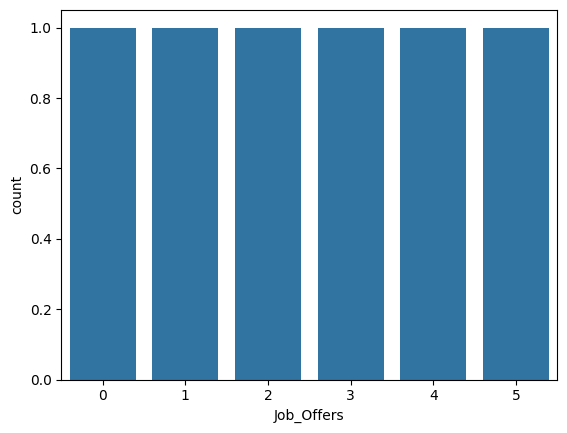

In [15]:
# Check the distribution of the target variable
sns.countplot(DIST_TARGET)
plt.show()

## MODELLING

#### BASE MODEL:: Linear regression model with backward stepwise selection

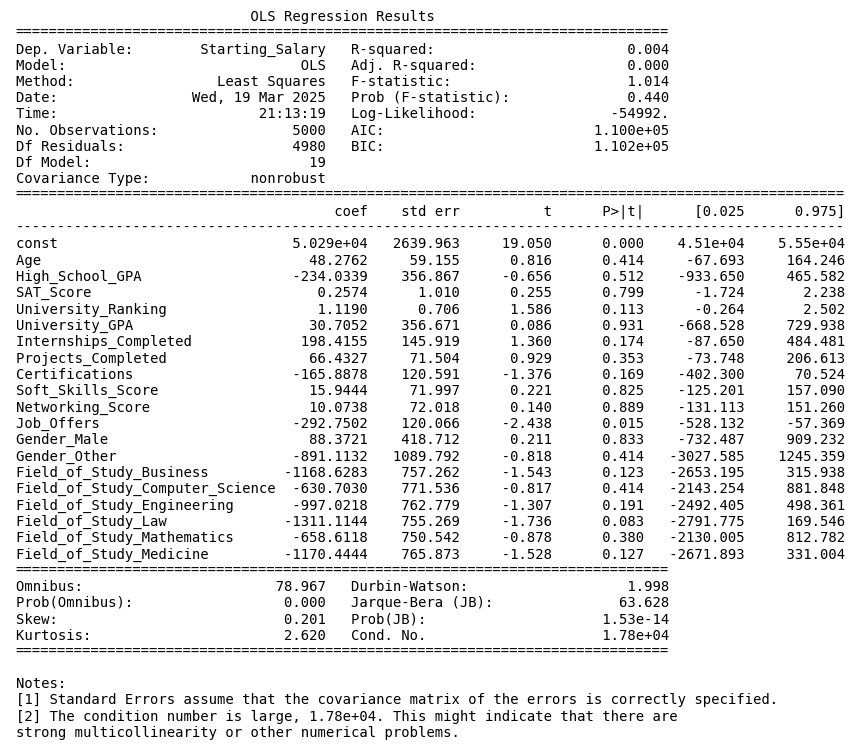

In [17]:
import statsmodels.api as sm
from tkinter import *
from PIL import ImageTk, Image

#define predictor and response variables
predictor_cols = ['Age', 'High_School_GPA', 'SAT_Score', 'University_Ranking',
       'University_GPA', 'Internships_Completed', 'Projects_Completed',
       'Certifications', 'Soft_Skills_Score', 'Networking_Score', 'Job_Offers',
       'Gender_Male', 'Gender_Other',
       'Field_of_Study_Business', 'Field_of_Study_Computer_Science',
       'Field_of_Study_Engineering', 'Field_of_Study_Law',
       'Field_of_Study_Mathematics', 'Field_of_Study_Medicine']

y = data['Starting_Salary']
x = data[predictor_cols]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

# pass the model results into a matplotlib figure and save as image
plt.rc('figure', figsize=(8, 5))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('results.png')

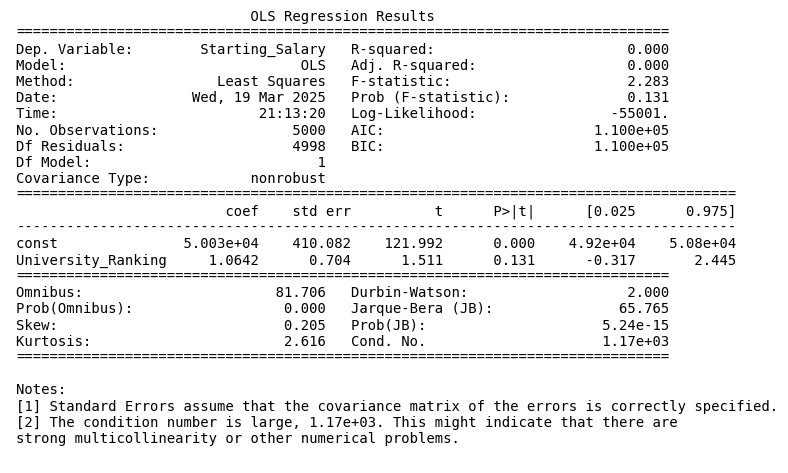

In [18]:
#define predictor and response variables
predictor_cols = ['University_Ranking',]

y = data['Starting_Salary']
x = data[predictor_cols]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
step_model = sm.OLS(y, x).fit()

# pass the model results into a matplotlib figure and save as image
plt.rc('figure', figsize=(8, 5))
plt.text(0.01, 0.05, str(step_model.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('results.png')

#### MODEL SELECTION:: compare multiple models

**select variables going into the models**

In [19]:
mod_colss = ['Age', 'High_School_GPA', 'SAT_Score', 'University_Ranking',
       'University_GPA', 'Internships_Completed', 'Projects_Completed',
       'Certifications', 'Soft_Skills_Score', 'Networking_Score', 'Job_Offers',
       'Gender_Male', 'Gender_Other', 'Starting_Salary',
       'Field_of_Study_Business', 'Field_of_Study_Computer_Science',
       'Field_of_Study_Engineering', 'Field_of_Study_Law',
       'Field_of_Study_Mathematics', 'Field_of_Study_Medicine']

datas = data[mod_colss]

**use pycaret to run and select multiple models**

In [20]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(datas, target = 'Starting_Salary', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Starting_Salary
2,Target type,Regression
3,Original data shape,"(5000, 20)"
4,Transformed data shape,"(5000, 20)"
5,Transformed train set shape,"(3500, 20)"
6,Transformed test set shape,"(1500, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [21]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,11837.3405,212931565.3384,14588.3311,-0.0034,0.3086,0.2710,0.0040
dummy,Dummy Regressor,11840.1917,212939932.0698,14588.5938,-0.0034,0.3086,0.2710,0.0050
br,Bayesian Ridge,11843.1968,213057947.6948,14592.6798,-0.0040,0.3086,0.2711,0.0050
en,Elastic Net,11843.3467,213114226.3056,14594.6510,-0.0043,0.3088,0.2712,0.1920
lasso,Lasso Regression,11852.2494,213592424.8357,14611.0445,-0.0065,0.3090,0.2714,0.2680
llar,Lasso Least Angle Regression,11852.2495,213592427.8864,14611.0446,-0.0065,0.3090,0.2714,0.0040
lr,Linear Regression,11852.3551,213598940.3208,14611.2633,-0.0066,0.3090,0.2714,0.3130
ridge,Ridge Regression,11852.2686,213594931.7883,14611.1282,-0.0066,0.3090,0.2714,0.2690
lar,Least Angle Regression,11855.8521,213695672.1162,14614.4884,-0.0070,0.3091,0.2714,0.0050
ada,AdaBoost Regressor,11919.1640,215801859.7507,14688.1378,-0.0175,0.3139,0.2796,0.0130


In [22]:
best = create_model('omp') #choose catboost to avoid plot errors with some models

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11762.6723,204396468.3507,14296.7293,-0.0050,0.2974,0.2602
1,11708.7820,213190093.8464,14601.0306,0.0040,0.3080,0.2680
2,11736.7168,211061838.2859,14527.9675,0.0016,0.3088,0.2687
3,11572.4207,208294884.0940,14432.4247,-0.0019,0.3145,0.2759
4,11475.8073,199583272.4460,14127.3944,0.0032,0.3025,0.2654
5,11798.4907,201270927.9040,14186.9986,-0.0190,0.3158,0.2875
6,12163.6865,224479643.3191,14982.6447,-0.0000,0.3125,0.2747
7,11980.3033,222534894.2168,14917.6035,-0.0040,0.3142,0.2751
8,11937.1375,213557054.8855,14613.5914,0.0017,0.3090,0.2745


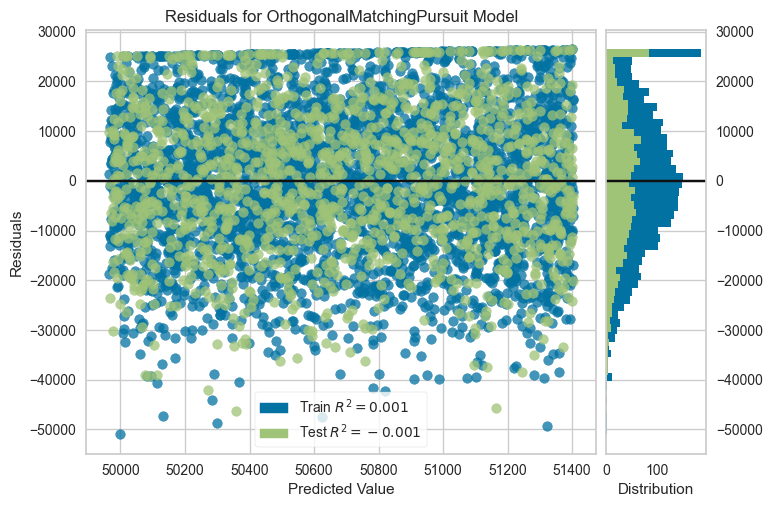

In [23]:
# plot residuals
plot_model(best, plot = 'residuals')

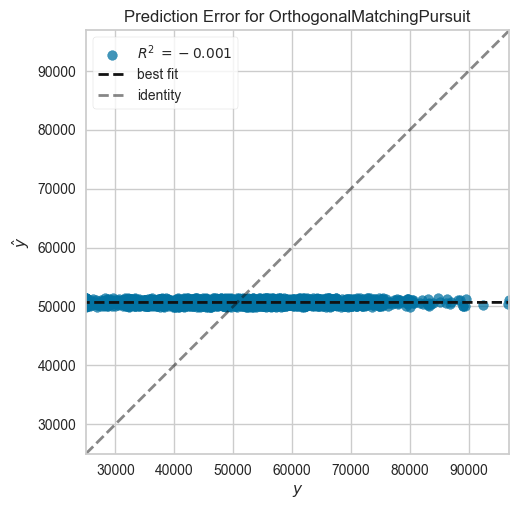

In [24]:
# plot error
plot_model(best, plot = 'error')

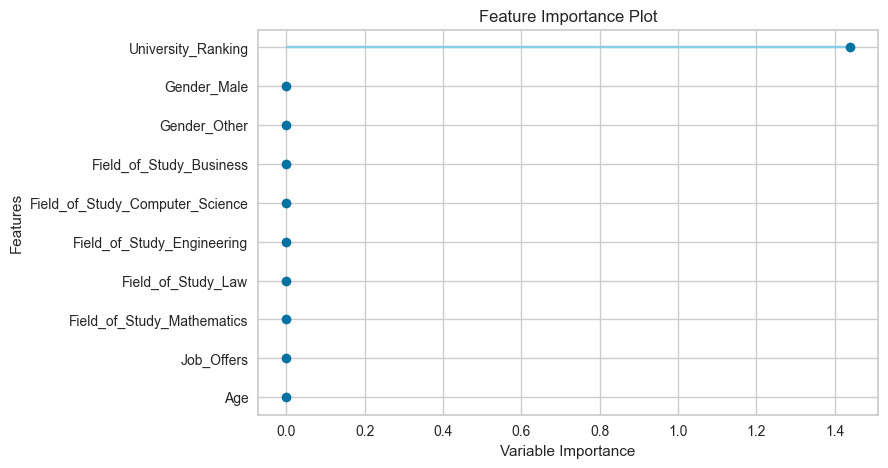

In [25]:
# plot feature importance
plot_model(best, plot = 'feature')

## END